# STA365 HW3 Penguin Analysis

### Author: Seo Won Yi (yiseo)

### Collborator: Serena Ban (banseri)

In [258]:
# import every necessary modules

import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# URL for the dataset obtained from https://www.kaggle.com/datasets/amulyas/penguin-size-dataset/data

data_url = "https://raw.githubusercontent.com/woom221/STA365-UofT/main/HW3/data/penguins_size.csv"

# read the dataset

df = pd.read_csv(data_url)

print(len(df.index))

df.head()

344


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [259]:
# detect how many rows contain missing data for each column

df.shape[0] - df.dropna().shape[0]

10

In [260]:
# we can see that the portion of missing data is around 3%
# for this analysis, we will remove them and conduct Complete Case Analysis

df.dropna(axis=0, inplace=True)

print(len(df.index))

df.head(5)

334


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [261]:
# first let's observe the data set

# Observe the column variables

print(list(df))

['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


In [262]:
# observe the unique values in each column

for column in list(df):
  print(df[column].unique())
  print("\n")

['Adelie' 'Chinstrap' 'Gentoo']


['Torgersen' 'Biscoe' 'Dream']


[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2 46.1
 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6 46.7
 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5 50.8
 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8 43.5
 49.6 48.7 43.3 48.4 45.1 46.3 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.
 45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4 43.4 52.1
 44.5 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]


[18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 21.1 19.  20.7 18.4 21.5
 18.3 19.2 18.1 17.2 18.9 18.6 17

In [263]:
# observe the statistical summary

print(df.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        334.000000       334.000000         334.000000   334.000000
mean          43.994311        17.160479         201.014970  4209.056886
std            5.460521         1.967909          14.022175   804.836129
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.575000        18.700000         213.000000  4793.750000
max           59.600000        21.500000         231.000000  6300.000000


73


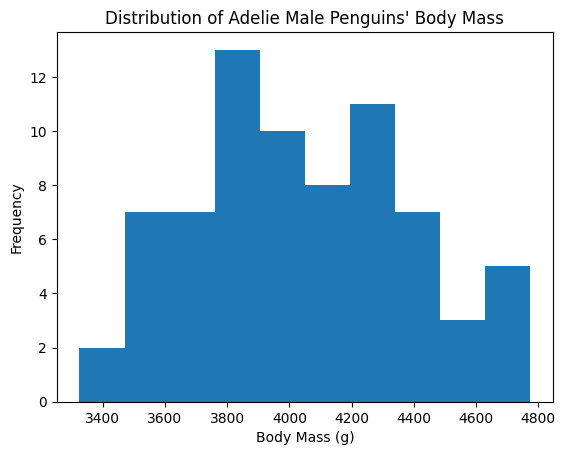

In [264]:
# We will analyze Body Mass of Male penguins with type "Adelie"
# I assume that the body mass of male penguins with type Adelie is roughly normally distributed
# We can confirm this by plotting the graph


df_filtered = df[(df["sex"] == "MALE") & (df["species"] == "Adelie")]

# check the number of rows after filtering
print(len(df_filtered.index))

# plot the histogram of body mass to observe the normal assumption
plt.hist(df_filtered["body_mass_g"].tolist())
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.title("Distribution of Adelie Male Penguins' Body Mass")
plt.show()

In [265]:
# Calculate the sample mean and sample precision

print("Sample mean is {}".format(round(np.mean(df_filtered["body_mass_g"].tolist()), 3)))
print("Sample precision is {}".format((1/np.std(df_filtered["body_mass_g"].tolist()))**(1/2)))

Sample mean is 4043.493
Sample precision is 0.053882881522977925


Even though the data is not perfectly normally distributed, for this analysis, we will assume that this is sufficient enough to say that it is normally distributed.

Looking at the data, it is reasonable to assume the mean is around 4043 while the sample precision is around 0.0539.

We will use the normal prior distribution of mean 4000 and standard deviation of 200 to describe the mean of the distribution that describes the data. Gamma distribution with $\alpha = 20$ and $\beta = 400$ was chosen to describe the distribution where precision of the data could be drawn from. We can confirm that these prior distributions include our sample mean and sample precision.

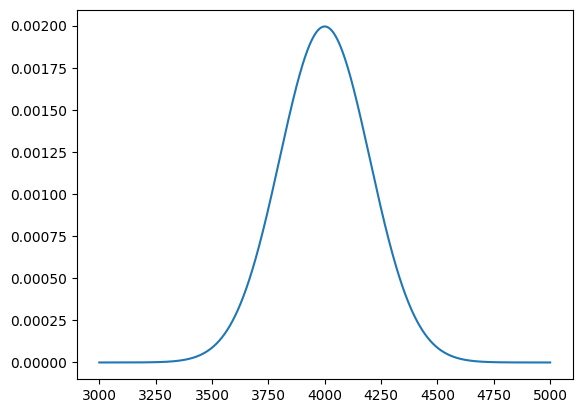

In [266]:
# prior distribution of mean parameter

x = np.linspace(3000, 5000, 10001)
mean = 4000
sigma = 200
ex = stats.norm(loc=mean, scale=sigma)

plt.plot(x, ex.pdf(x))

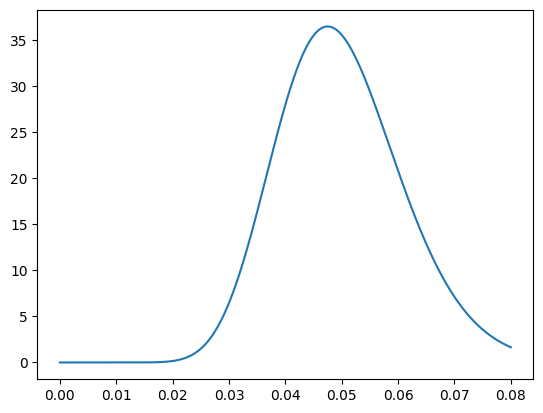

In [267]:
# prior distribution of precision parameter

x = np.linspace(0, 0.08, 10001)
alpha = 20
beta = 400
ex = stats.gamma(a=alpha, scale=1/beta)

plt.plot(x, ex.pdf(x))

We can confirm that our prior distributions include the sample mean and sample precision.

We will utilize PyMC to perform Hamiltonian Monte Carlo to find the credible interval for mean and precision parameter (i.e., $\theta$ and $\phi$) and perform various analysis on them.

In [268]:
# use PyMC to specify the model

x = df_filtered["body_mass_g"].tolist()

normal_gamma_model = pm.Model()
with normal_gamma_model:
    theta = pm.Normal("theta", mu=4000, sigma=200)
    phi = pm.Gamma("phi", alpha=20, beta=400)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=(1/phi)**0.5, observed=x)

In [269]:
# perform Hamiltonian Monte Carlo

with normal_gamma_model:
  HMC_result = pm.sample(chains=4)

HMC Split-Rhats {'theta': 1.0006, 'phi': 1.0003}


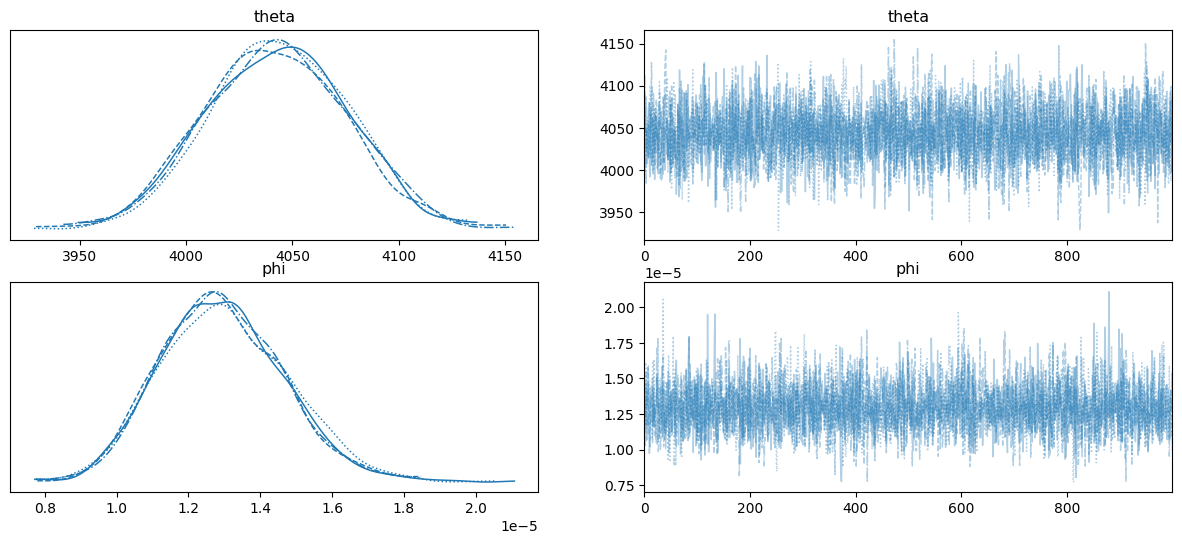

In [270]:
# Check convergence of the chains and check the Rhat value

f, ax = plt.subplots(2, 2, figsize=(15, 6))
az.plot_trace(HMC_result, axes=ax[:2,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(HMC_result).items()})

Text(0.5, 1.0, 'HMC')

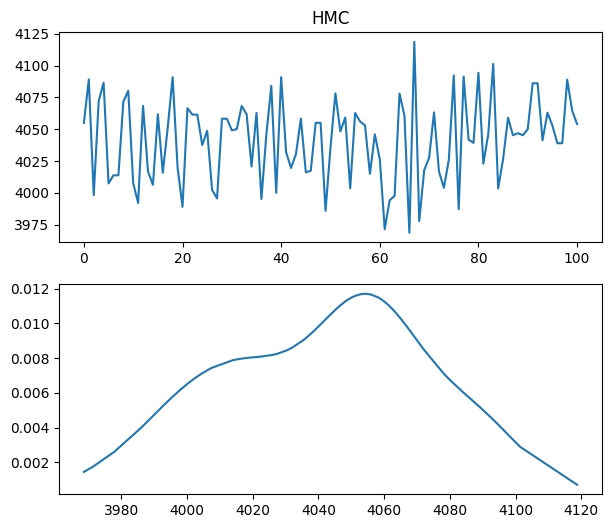

In [271]:
# Check how HMC converged the mean paramter theta
# plot the resulting distribution of theta

fig,ax = plt.subplots(2,1, figsize=(7,6))
n_mcmc_samples = 100
mcmc_chain = HMC_result.posterior["theta"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values
mcmc_chain_sorted = sorted(mcmc_chain)
ax[0].plot(mcmc_chain)
ax[1].plot(mcmc_chain_sorted, stats.gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted))
ax[0].set_title("HMC")

Autocorrelation for HMC (MCMC) chain 0.043071792614566354


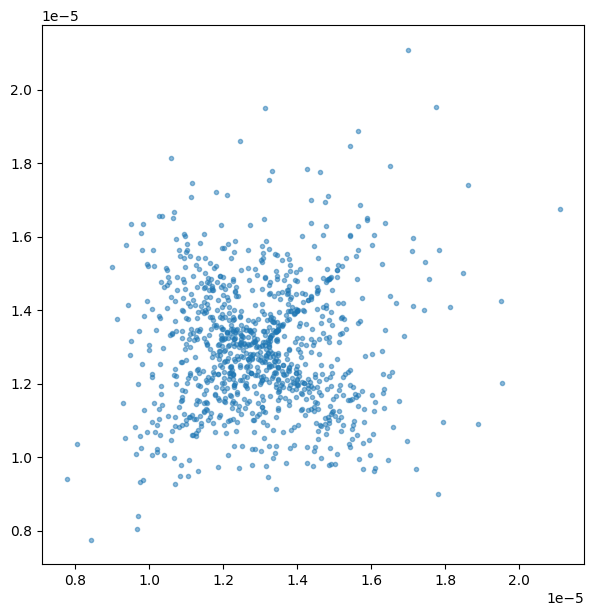

In [272]:
# check the autocorrelation of the precision paramter phi samples

fig,ax = plt.subplots(1,1, figsize=(7,7))

max_mcmc_samples = 1000

mcmc_chain = HMC_result.posterior["phi"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values

mcmc_chain_one_step_ahead = HMC_result.posterior["phi"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values
ax.plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)
print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1])

In [273]:
# check the effective size to see how well our HMC performed

print("number of MCMC samples:", HMC_result.posterior['phi'].values.flatten().shape[-1])
az.summary(HMC_result, round_to=10)

number of MCMC samples: 4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,4042.775608,33.267960,3979.228518,4101.338926,5.302012e-01,3.749366e-01,3933.349406,2857.603787,1.000599
phi,0.000013,0.000002,0.000010,0.000016,2.760000e-08,1.970000e-08,3976.743844,3072.035010,1.000254


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

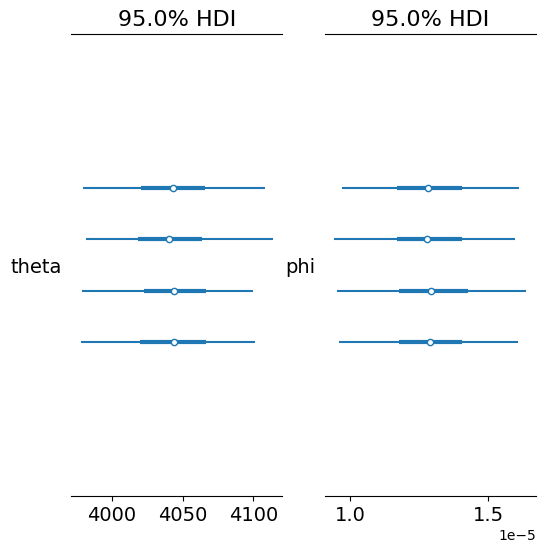

In [274]:
# get the credible interval for theta and phi

fig,ax = plt.subplots(1,2, figsize=(6,6))

az.plot_forest(HMC_result, var_names=["theta"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(HMC_result, var_names=["phi"], combined=False, hdi_prob=0.95, ax=ax[1])

The Rhat value less than 1.05 shows that our chains converged fairly well.

The overall result suggests that there is a $94\%$ chance that the mean of Male Adelie Penguin's bodymass lies between 3979.23g and 4101.34g. The precision of the posterior normal distribution has credible interval with lower bound value of 0.000010 and upper bound value of 0.000016 with the same level of significance.

We can confirm that our model has relatively high effective sample size. The result is mainly from the negative autocorrelation that was observed while processing hamiltonian monte carlo.

Now we will perform the analysis on the distributions of Penguin's sex.


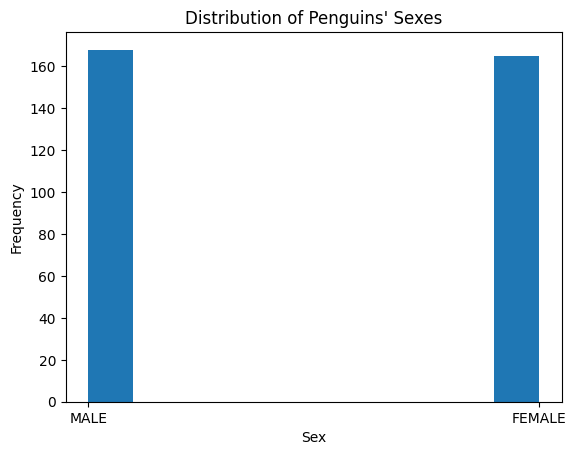

In [298]:
# We will observe the distribution of penguin's sex with every species provided from the data

df_sex = df[(df["sex"] == "MALE") | (df["sex"] == "FEMALE")]

plt.hist(df_sex["sex"].tolist())
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Distribution of Penguins' Sexes")
plt.show()

We will assume that the sex distribution of penguins follow Bernoulli distribution with parameter $\theta$.

From the distribution of the data, we can assume that $\theta$ would be around $0.5$.

We will use Beta distribution with $\alpha = 10$ and $\beta = 10$.

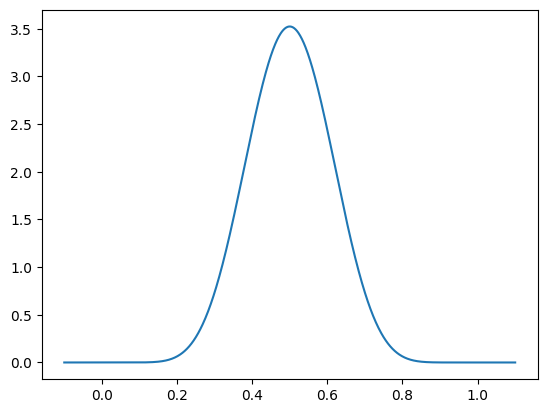

In [299]:
# prior distribution of parameter theta

x = np.linspace(-0.1, 1.1, 1001)
alpha = 10
beta = 10
beta_dist = stats.beta(a=alpha, b=beta)

plt.plot(x, beta_dist.pdf(x))

In [300]:
# use PyMC to specify the model

x = df_sex["sex"].tolist()

# change male to 1 and female to 0

x = [1 if x == "MALE" else 0 for x in x]

bern_beta_model = pm.Model()
with bern_beta_model:
    theta = pm.Beta("theta", alpha=10, beta=10)
    x_obs = pm.Bernoulli("likelihood", p=theta, observed=x)

In [301]:
# perform Hamiltonian Monte Carlo

with bern_beta_model:
  HMC_result = pm.sample(chains=4)

HMC Split-Rhats {'theta': 1.0046}


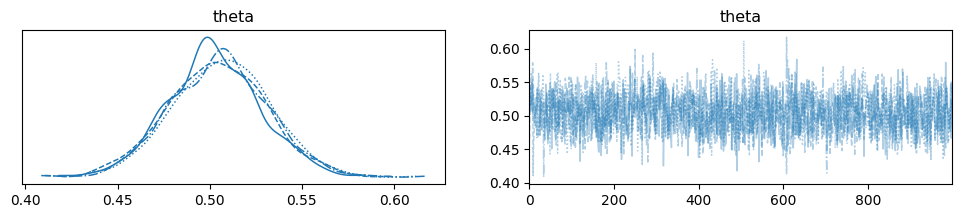

In [309]:
# Check convergence of the chains and check the Rhat value

az.plot_trace(HMC_result)
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(HMC_result).items()})

Text(0.5, 1.0, 'HMC')

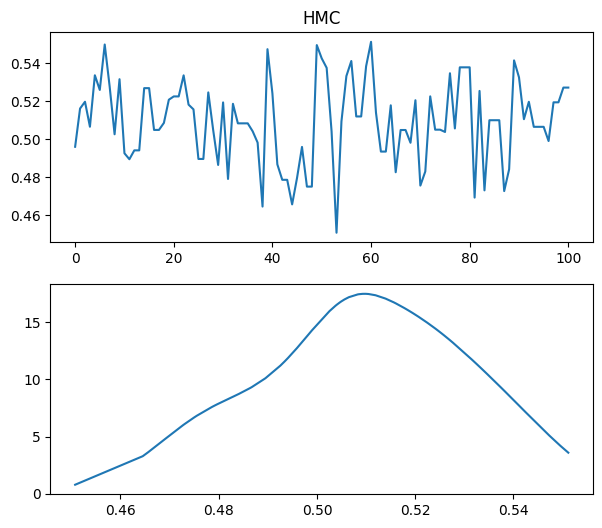

In [310]:
# Check how HMC converged the mean paramter theta
# plot the resulting distribution of theta

fig,ax = plt.subplots(2,1, figsize=(7,6))
n_mcmc_samples = 100
mcmc_chain = HMC_result.posterior["theta"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values
mcmc_chain_sorted = sorted(mcmc_chain)
ax[0].plot(mcmc_chain)
ax[1].plot(mcmc_chain_sorted, stats.gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted))
ax[0].set_title("HMC")

Autocorrelation for HMC (MCMC) chain 0.17009428308045785


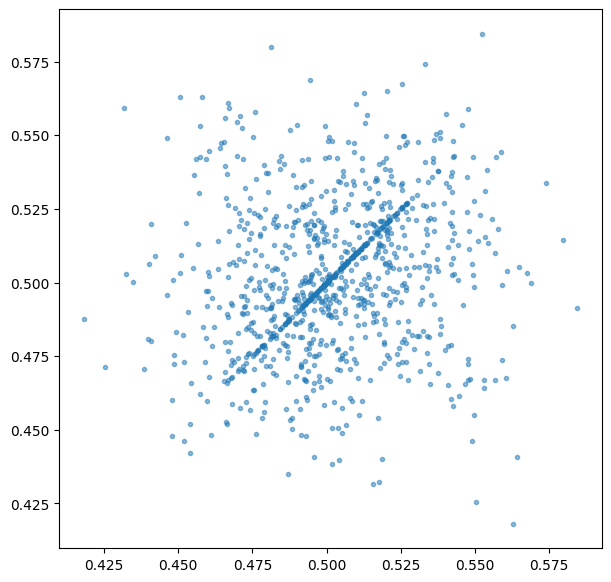

In [313]:
# check the autocorrelation of the precision paramter phi samples

fig,ax = plt.subplots(1,1, figsize=(7,7))

max_mcmc_samples = 1000

mcmc_chain = HMC_result.posterior["theta"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values

mcmc_chain_one_step_ahead = HMC_result.posterior["theta"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values
ax.plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)
print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1])

In [314]:
# check the effective size to see how well our HMC performed

print("number of MCMC samples:", HMC_result.posterior['theta'].values.flatten().shape[-1])
az.summary(HMC_result, round_to=10)

number of MCMC samples: 4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.504505,0.026087,0.456115,0.554427,0.000613,0.000434,1798.129764,2770.953029,1.00462


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

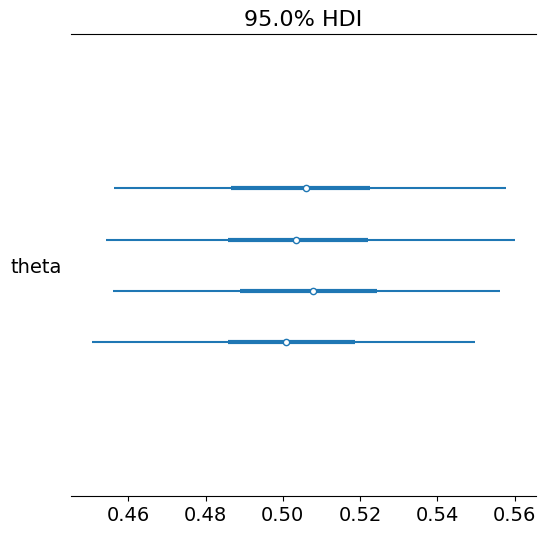

In [315]:
# get the credible interval for theta and phi

fig,ax = plt.subplots(1,1, figsize=(6,6))

az.plot_forest(HMC_result, var_names=["theta"], combined=False, hdi_prob=0.95, ax=ax)

From the analysis, we can see that our R value is less than 1.05 which indicates the convergence of the chains.

Unlike the previous result, it seems like the effective sample size is relatively lower (less than half of the sample). Interestingly, effective sample size of counting tails appeared to be larger than regular effective sample size. This is due to the positive autocorrelation acquired while processing Hamiltonian Monte Carlo.

Finally, we can see that the $94\%$ credible interval is given by (0.456, 0.554).